In [56]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math
import scipy
from scipy.optimize import curve_fit
from metpy.plots import SkewT
from metpy.units import units

In [100]:
df = pd.read_csv('A595D-Stability_exercise.csv',skiprows=[0]) #change the name of the csv file to the name of the file you imported
windsp=df['knot']
winddir=df['deg']
T=df['deg C']
z=df['m']

potentialT=T+((9.8/1000)*z)

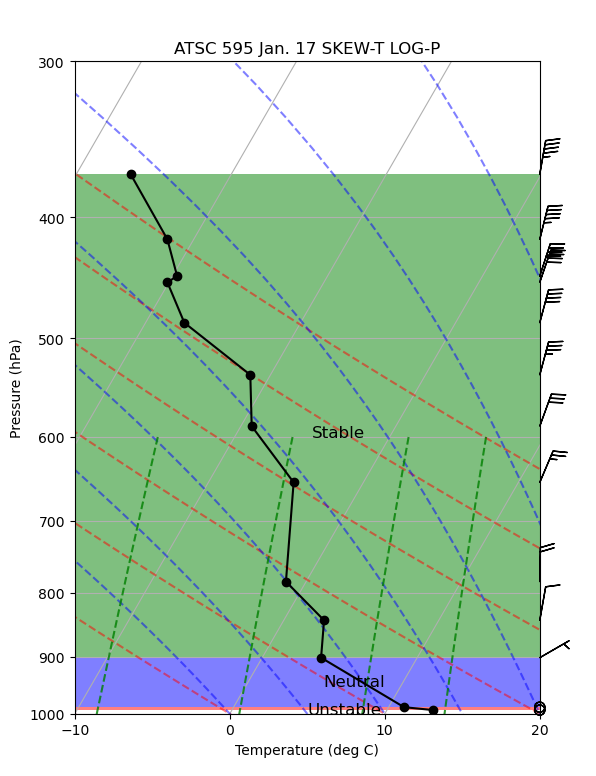

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT

# Provided temperature and height data
T = np.array([13, 11, 3.8, 2.6, -1.3, -4.5, -9.3, -11.3, -17.5, -20.1, -19.7, -21.7, -26.5])
z = np.array([168, 211, 947, 1500, 2047, 3464, 4204, 4898, 5503, 6000, 6094, 6546, 7290])

# Constants
p0 = 1013.25  # Standard sea-level pressure in hPa
R_d = 287.05   # Gas constant for dry air in J/(kg K)
g = 9.8        # Acceleration due to gravity in m/s^2

# Convert height to pressure using the hypsometric equation
T_K = T + 273.15  # Convert temperature to Kelvin

p = p0 * np.exp(-g * z / (R_d * T_K))

# Create a SkewT plot
fig = plt.figure(figsize=(6, 9))
skew = SkewT(fig)

# Plot the wind barbs from the original data
skew.plot_barbs(p[::], U[::], V[::])

# Add necessary lines 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

#Set axes limits
skew.ax.set_ylim(1000, 300) 
skew.ax.set_xlim(-10, 20)   

# Plot temperature profile
skew.ax.plot(T, p, marker='o', linestyle='-', color='k', label='Temperature')

plt.xlabel('Temperature (deg C)')
plt.ylabel('Pressure (hPa)')
plt.title('ATSC 595 Jan. 17 SKEW-T LOG-P')


#Plot stabilities:
plt.axhspan(p[0], p[1], color='red', alpha=0.5, lw=0)
plt.axhspan(p[1], p[2], color='blue', alpha=0.5, lw=0)
plt.axhspan(p[2], p[12], color='green', alpha=0.5, lw=0)

plt.text(5, 1000 , "Unstable", fontsize=12)
plt.text(5, 950 , "Neutral", fontsize=12)
plt.text(-5, 600 , "Stable", fontsize=12)

# Show the plot
plt.show()


Text(0, 0.5, 'Height Z (m)')

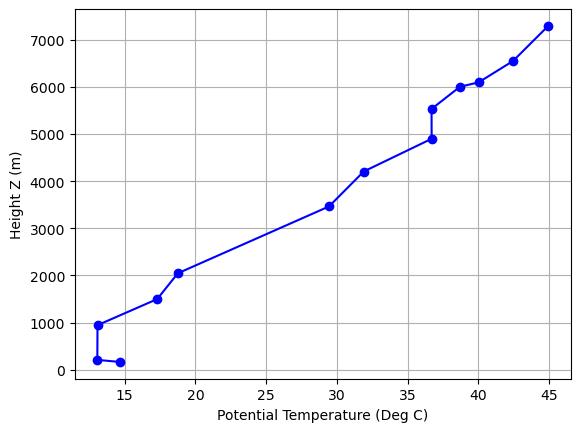

In [12]:
plt.plot(potentialT,z,'b')
plt.plot(potentialT,z,'ob')
#plt.plot(T,z)
plt.grid()
plt.xlabel('Potential Temperature (Deg C)')
plt.ylabel('Height Z (m)')
#plt.yscale('log')

In [5]:
#Define functions
def find_differences(arr):
    # Initialize an empty array to store the differences
    differences = []

    # Iterate through the elements of the input array
    for i in range(1, len(arr)):
        # Calculate the difference between adjacent elements and append to the new array
        differences.append(arr[i] - arr[i - 1])

    return differences

#---------------------------------------------------------------------------------------------------------------

def calculate_average(arr):
    # Initialize an empty array to store the average values
    averages = []

    # Iterate through the elements of the input array
    for i in range(1, len(arr)):
        # Calculate the average between adjacent elements and append to the new array
        average = (arr[i] + arr[i - 1]) / 2
        averages.append(average)

    return averages



In [6]:
#Parameters needed
winddir=winddir.astype(float)
windsp_ms=windsp*0.51444
g=9.8 #m/s^2

delta_potentialT = find_differences(potentialT)
delta_z=find_differences(z)
U=windsp_ms*np.cos(np.radians(winddir))
V=windsp_ms*np.sin(np.radians(winddir))
delta_U=find_differences(U)
delta_V=find_differences(V)

#Convert to numpy arrays for calculations 
delta_potentialT=np.array(delta_potentialT)
delta_z=np.array(delta_z)
delta_U=np.array(delta_U) #conversion from knot to m/s
delta_V=np.array(delta_V) #conversion from knot to m/s

#Calculate squares of wind components
delta_U_sq=delta_U**2
delta_V_sq=delta_V**2


In [7]:
#Calculate the average temperature between measurements to define each layer
Tv=T+273.15 #K

T_avg=calculate_average(Tv)
T_avg=np.array(T_avg)

z_avg=calculate_average(z)
z_avg=np.array(z_avg)

In [8]:
#Richardson number calculation
Ri=(g*delta_potentialT*delta_z)/(T_avg*(delta_U_sq+delta_V_sq))
np.set_printoptions(suppress=True)
Ri

array([-0.69279075,  0.00714974,  0.9091596 ,  0.76264469,  4.65478717,
        1.65815655,  8.43662044, -0.0057886 ,  3.58849363,  6.20808895,
        1.94292401,  7.47334062])

Text(0.5, 700, 'dynamically \n stable')

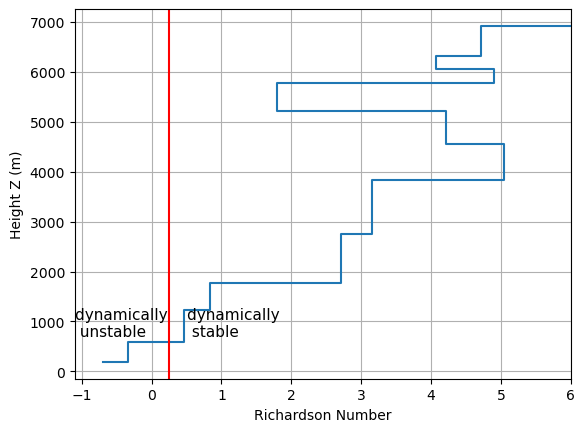

In [9]:
plt.step(Ri,z_avg,where='mid')
plt.grid()
plt.axvline(x=0.25,color='r')
plt.xlabel('Richardson Number')
plt.ylabel('Height Z (m)')
plt.xlim(-1.1, 6)
plt.text(-1.1, 700 , "dynamically \n unstable", fontsize=11)
plt.text(0.5, 700 , "dynamically \n stable", fontsize=11)

In [10]:
#If Ri > 0.25, air is dynamically stable
#If Ri < 0.25, air is dynamically unsable 